In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten
from keras.optimizers import RMSprop
from keras.layers.convolutional import Conv2D,MaxPooling2D

Using TensorFlow backend.


In [2]:
!git clone https://github.com/umabratamahata/VSSUT_FACE.git

Cloning into 'VSSUT_FACE'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [3]:
!ls VSSUT_FACE

images.p  labels.p


In [0]:
with open("VSSUT_FACE/images.p","rb") as f:
  images = pickle.load(f)
with open("VSSUT_FACE/labels.p","rb") as f:
  labels = pickle.load(f)

In [5]:
print(images.shape)
print(labels.shape)
set(labels)

(648, 100, 100)
(648,)


{'Abhishek',
 'Nikhil',
 'Ranjan',
 'Roshan',
 'abishek',
 'himanshu',
 'nikhil',
 'siddharth',
 'sourav'}

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [7]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [8]:
n_classes = len(set(labels))
label_mapping = le.inverse_transform(np.arange(n_classes))
print("number of classes : ",n_classes)
print(label_mapping)

number of classes :  9
['Abhishek' 'Nikhil' 'Ranjan' 'Roshan' 'abishek' 'himanshu' 'nikhil'
 'siddharth' 'sourav']


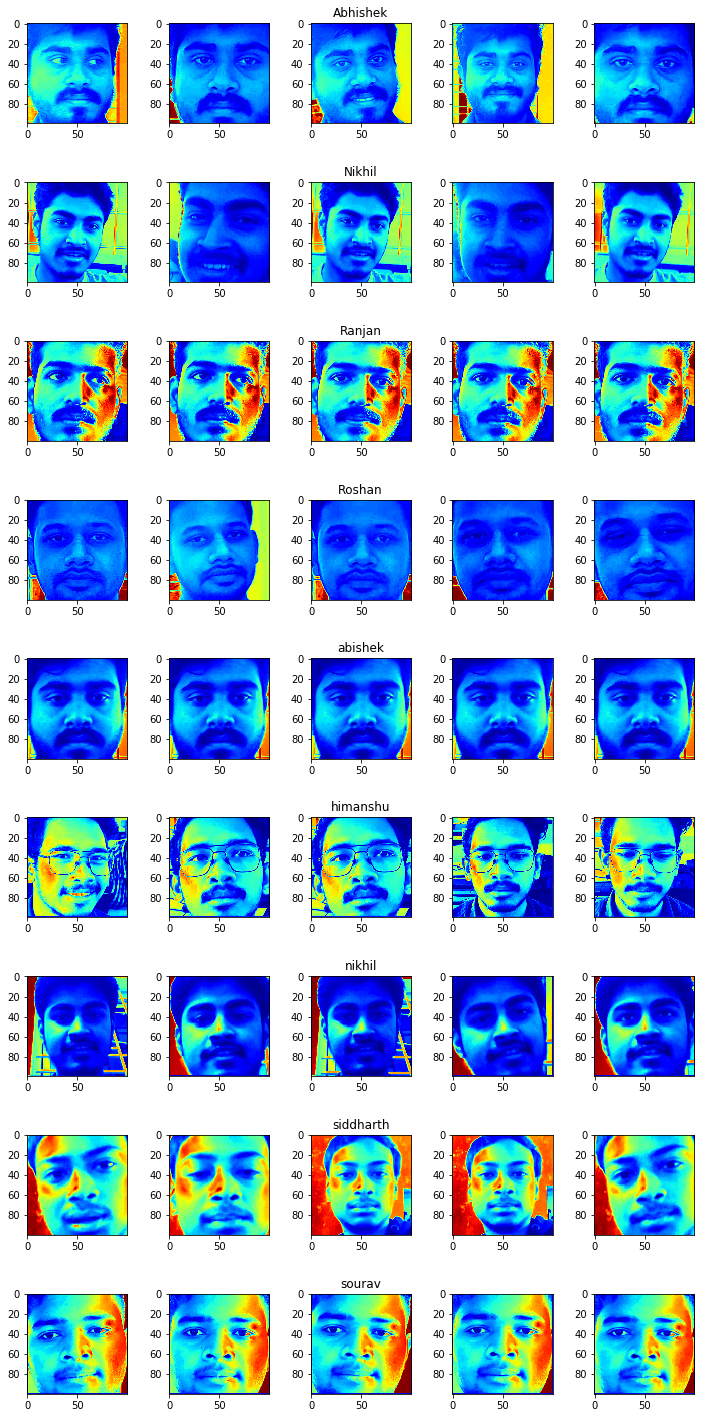

In [9]:

fig,axes=plt.subplots(nrows=n_classes,ncols=5,figsize=(10,20))
fig.tight_layout()

for i in range(n_classes):
  for j in range(5):
    axes[i][j].imshow(images[labels==i]
                      [np.random.randint(0,len(images[labels==i]))],cmap="jet")
    if j==2:
      axes[i][j].set_title(label_mapping[i])

In [0]:
def preprocess(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [11]:
images = np.array(list(map(preprocess,images)))
images.shape

(648, 100, 100, 1)

In [0]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(images,labels,test_size=0.1)

In [0]:
ytr = to_categorical(ytr,n_classes)
yts = to_categorical(yts,n_classes)

In [14]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(100,100,1),strides=2,activation="relu"))
model.add(Conv2D(32,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.compile(RMSprop(lr=1e-4),loss=["categorical_crossentropy"],
              metrics=["accuracy"])

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)             

In [16]:
h = model.fit(xtr,ytr,epochs=20,verbose=1,validation_data=(xts,yts))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 583 samples, validate on 65 samples
Epoch 1/20





583/583 [==============================] - 15s 25ms/step - loss: 1.9151 - acc: 0.3156 - val_loss: 1.4070 - val_acc: 0.6462
Epoch 2/20
583/583 [==============================] - 0s 503us/step - loss: 1.1297 - acc: 0.6587 - val_loss: 0.8159 - val_acc: 0.7077
Epoch 3/20
583/583 [==============================] - 0s 490us/step - loss: 0.5427 - acc: 0.8628 - val_loss: 0.3573 - val_acc: 0.9077
Epoch 4/20
583/583 [==============================] - 0s 480us/step - loss: 0.2458 - acc: 0.9365 - val_loss: 0.2887 - val_acc: 0.9077
Epoch 5/20
583/583 [==============================] - 0s 482us/step - loss: 0.1667 - acc: 0.9554 - val_loss: 0.0625 - val_acc: 1.0000
Epoch 6/20
583/583 [==============================] - 0s 480us/step - loss: 0.0547 - acc: 0.9966 - val_loss: 0.0270 - val_acc: 1.0000
Epoch 7/20
583/583 [=============================

In [0]:
layer0 = Model(model.layers[0].input,model.layers[0].output)

In [0]:
features = layer0.predict(xts[0].reshape(1,100,100,1))

In [19]:
features.shape

(1, 48, 48, 32)

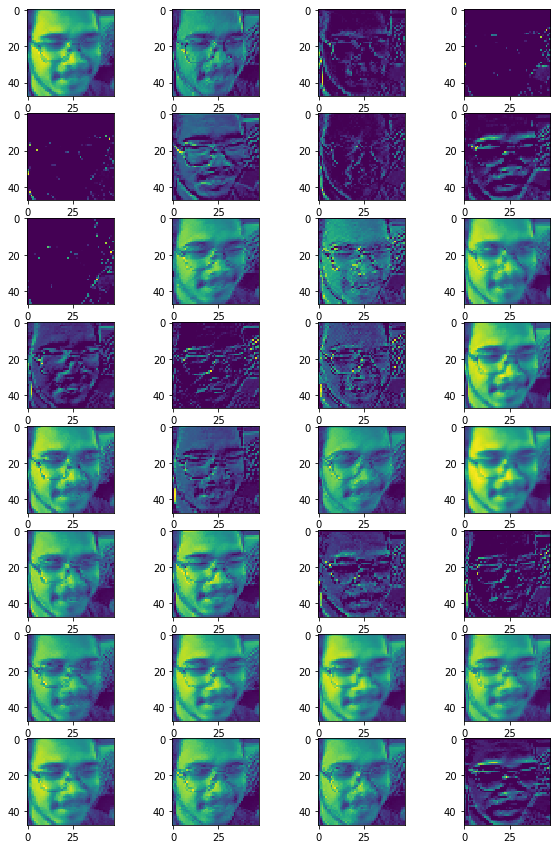

In [21]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8,4,i+1)
  plt.imshow(features[0,:,:,i])

In [22]:
ytr.shape

(583, 9)

In [0]:
model.save("FACE_VSSUT.h5")